# Twitter Streaming And Email Alert

#### Sending email reference

https://stackabuse.com/how-to-send-emails-with-gmail-using-python/


https://stackoverflow.com/questions/10147455/how-to-send-an-email-with-gmail-as-provider-using-python

### 1. Setup the email

In [ ]:
import smtplib

def send_email(user, pwd, recipient, subject, body):    

    FROM = user
    TO = recipient if isinstance(recipient, list) else [recipient]
    SUBJECT = subject
    TEXT = body

    # Prepare actual message
    message = """From: %s\nTo: %s\nSubject: %s\n\n%s
    """ % (FROM, ", ".join(TO), SUBJECT, TEXT)
    try:
        server = smtplib.SMTP("smtp.gmail.com", 587)
        server.ehlo()
        server.starttls()  # upgrade the connection to secure
        server.login(user, pwd)
        server.sendmail(FROM, TO, message)
        server.close()
        print ('successfully sent the mail')
    except:
        print ("failed to send mail")

gmail_user = 'fwayne2012@gmail.com'
gmail_password = 'Cnrc5068'
to = ['derrick.wang@dialyspa.com']
subject = 'Sent by Python'

### 2. Setup Twitter Connection

In [137]:
import re
import pandas as pd
import numpy as np
import tweepy
import pandas
import json # The API returns JSON formatted text
import warnings
import os
from matplotlib import pyplot as plt

os.chdir(r'C:\Users\dwang\Documents\Tech Docs\Natural Language Processing\Twitter')
warnings.simplefilter('ignore')
% matplotlib inline

# Store OAuth authentication credentials - get at https://developer.twitter.com/en/apps
access_token = "1090469255995363328-Zp0IczEkb7OZV9zyFx29WCf36BaHDu"
access_token_secret = "Va2DUqrIez2AR6ksOrjmeHiynR8OJhLd4d56fldkn4uhM"
consumer_key = "Vb2SjXqcB1mr0OBeqapXKHfjT"
consumer_secret = "S7CCwSE35ImaDJ7GOVeAgaExKQT9kVeJJ1gI0SMZE6LM97DOJn"


# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

### 3. Define the twitter streaming

In [ ]:
TWEETS_TO_CAPTURE = 10
RstList = []

def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')


class MyStreamListener(tweepy.StreamListener):
    """
    Twitter listener, collects streaming tweets and output to a file
    """
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        #self.file = open(OUTPUT_FILE, "w")

    def on_status(self, status):
        tweet = status._json
        UserId = tweet['user']['id']
        
        if str(UserId) in [TwitterID_DT, TwitterID_DW]:                     
            tweet_id = tweet['id']
            TweetTime = tweet['created_at']       
            try:
                Text = tweet['extended_tweet']['full_text']
                Text = re.sub(r'@+[a-zA-Z]+','',Text)
                Text = re.sub(r'#+[a-zA-Z]+','',Text)
                Text = re.sub(r'\n','', Text)
            except:
                Text = tweet['text']
                Text = re.sub(r'@+[a-zA-Z]+','',Text)
                Text = re.sub(r'#+[a-zA-Z0-9]+','',Text)
                Text = re.sub(r'\n','', Text)
                
            #UserName = tweet['user']['name']        
            UserScreenName = tweet['user']['screen_name']            
            body = deEmojify(Text)  
            RstList.append([TweetTime, tweet_id, deEmojify(Text), UserScreenName, UserId])
            send_email(gmail_user, gmail_password, to, subject, body)
        
            self.num_tweets += 1
            print('Numer of tweets captured so far: {}'.format(self.num_tweets))
            
            if self.num_tweets < TWEETS_TO_CAPTURE:                
                return True  # continue streaming
            else:                
                return False  # stop streaming

    def on_error(self, status):
        print(status)

### 4. Run the streaming and send email if DT or DW tweets

In [ ]:
TwitterID_DW = '1090469255995363328'
TwitterID_DT = '25073877'

# Initialize Stream listener
l = MyStreamListener()

# Create you Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords or userID:
stream.filter(follow= [TwitterID_DW, TwitterID_DT])

In [ ]:
Rst = pd.DataFrame(RstList, columns = ['DateTime', 'TweetId','Text', 'UserName', 'UserID'])
Rst['DateTime'] = pd.to_datetime(Rst['DateTime'])
Rst['DateTime'] = Rst['DateTime'].dt.tz_convert('America/Chicago')
#Rst['DateTime'] = Rst['DateTime'].
Rst

### 5. Sending Aleart email to notify that streaming stopped or completed

In [ ]:
body = 'Streaming completed or stopped.'
send_email(gmail_user, gmail_password, to, subject, body)

# ===============================================================

# Historical Tweets

In [625]:
HisDf = pd.read_csv(r'rdt_20191003.csv')
HisDf.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Fake News just like the snakes and gators in t...,10-03-2019 13:40:19,9694,34020,False,1179753043908268032
1,Twitter for iPhone,RT @DonaldJTrumpJr: Good times with @seanhanni...,10-03-2019 13:26:53,7320,0,True,1179749665941676032
2,Twitter for iPhone,Schiff is a lowlife who should resign (at leas...,10-03-2019 12:09:33,13614,47095,False,1179730204001996800
3,Twitter for iPhone,RT @TrumpWarRoom: NBC News reports that Hunter...,10-03-2019 12:07:04,12280,0,True,1179729579239448582
4,Twitter for iPhone,RT @replouiegohmert: Honored heroic wounded wa...,10-03-2019 12:05:51,2903,0,True,1179729271620849664


In [626]:
len(HisDf)

10766

In [627]:
HisDf['created_at'] = pd.to_datetime(HisDf['created_at'])
HisDf['created_at'] = HisDf['created_at'].dt.tz_localize('GMT')
HisDf['created_at'] = HisDf['created_at'].dt.tz_convert('America/New_York')

In [628]:
HisDf.tail()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
10761,Twitter for Android,Congratulations to Rex Tillerson on being swor...,2017-02-02 06:18:21-05:00,15883,115116,False,827113926517194757
10762,Twitter for Android,If U.C. Berkeley does not allow free speech an...,2017-02-02 06:13:13-05:00,60266,213655,False,827112633224544256
10763,Twitter for Android,Do you believe it? The Obama Administration ag...,2017-02-01 22:55:49-05:00,37373,152041,False,827002559122567168
10764,Twitter for Android,Iran is rapidly taking over more and more of I...,2017-02-01 22:06:14-05:00,20915,93611,False,826990079738540033
10765,Twitter for Android,Everybody is arguing whether or not it is a BA...,2017-02-01 07:50:16-05:00,60583,252382,False,826774668245946368


In [629]:
HisDf['Year'] = HisDf['created_at'].dt.year
HisDf['Month'] = HisDf['created_at'].dt.month
HisDf['Weekday'] = HisDf['created_at'].dt.weekday
HisDf['Hour'] = HisDf['created_at'].dt.hour

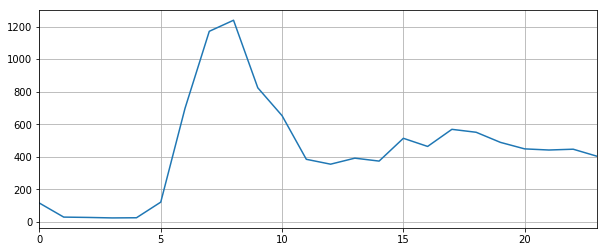

In [547]:
HisDf['Hour'].value_counts().sort_index().plot(figsize=(10,4), grid=True)

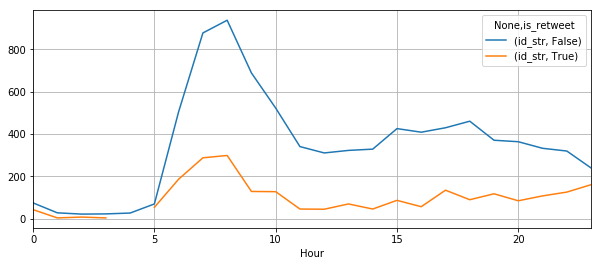

In [548]:
HisDf[['is_retweet','Hour','id_str']].groupby(['is_retweet','Hour']).count().unstack('is_retweet').plot(figsize=(10,4), grid=True)

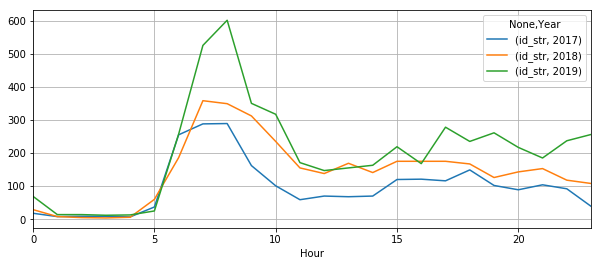

In [549]:
HisDf[['Year','Hour','id_str']].groupby(['Year','Hour']).count().unstack('Year').plot(figsize=(10,4), grid=True)

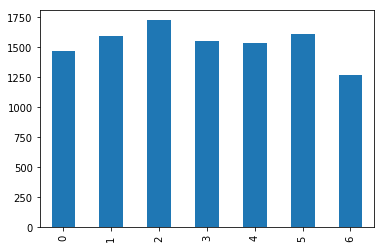

In [550]:
HisDf['Weekday'].value_counts().sort_index().plot.bar()
#plt.ylim(0,6500)

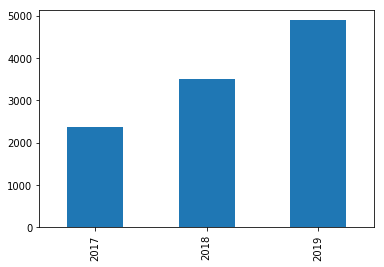

In [551]:
HisDf['Year'].value_counts().sort_index().plot.bar()
#plt.ylim(0,4000)

### Merge Trump Tweets with STK

In [552]:
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf  
stk = yf.download('^GSPC','2017-01-20','2019-10-03')
stk.head()

[*********************100%***********************]  1 of 1 downloaded


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2017-01-20,2271.31,2271.31,2276.96,2265.01,2269.96,3524970000
2017-01-23,2265.20,2265.20,2271.78,2257.02,2267.78,3152710000
2017-01-24,2280.07,2280.07,2284.63,2266.68,2267.88,3810960000
2017-01-25,2298.37,2298.37,2299.55,2288.88,2288.88,3846020000
2017-01-26,2296.68,2296.68,2300.99,2294.08,2298.63,3610360000


In [553]:
stk = stk.reset_index()
stk = stk.sort_values(by = 'Date')

In [554]:
stk.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2017-01-20,2271.31,2271.31,2276.96,2265.01,2269.96,3524970000
1,2017-01-23,2265.20,2265.20,2271.78,2257.02,2267.78,3152710000
2,2017-01-24,2280.07,2280.07,2284.63,2266.68,2267.88,3810960000
3,2017-01-25,2298.37,2298.37,2299.55,2288.88,2288.88,3846020000
4,2017-01-26,2296.68,2296.68,2300.99,2294.08,2298.63,3610360000


In [555]:
stk.tail()

,Date,Adj Close,Close,High,Low,Open,Volume
676,2019-09-27,2961.79,2961.79,2987.31,2945.53,2985.47,3243650000
677,2019-09-30,2976.74,2976.74,2983.85,2967.07,2967.07,3247610000
678,2019-10-01,2940.25,2940.25,2992.53,2938.70,2983.69,3558040000
679,2019-10-02,2887.61,2887.61,2924.78,2874.93,2924.78,3912520000
680,2019-10-03,2910.63,2910.63,2911.13,2855.94,2885.38,3503640000


In [556]:
len(stk)

681

In [631]:
HisDf['Date'] = HisDf['created_at'].dt.date

In [632]:
HisDf = HisDf[HisDf['is_retweet'] == 0]
HisDf = HisDf[['id_str','Date','Year', 'Month', 'Weekday', 'Hour', 'text', 'created_at']]
HisDf.head()

,id_str,Date,Year,Month,Weekday,Hour,text,created_at
0,1179753043908268032,2019-10-03,2019,10,3,9,Fake News just like the snakes and gators in t...,2019-10-03 09:40:19-04:00
2,1179730204001996800,2019-10-03,2019,10,3,8,Schiff is a lowlife who should resign (at leas...,2019-10-03 08:09:33-04:00
9,1179721857441902593,2019-10-03,2019,10,3,7,Schiff is a lying disaster for our Country. He...,2019-10-03 07:36:23-04:00
10,1179721004291170304,2019-10-03,2019,10,3,7,The Republican Party has never had such suppor...,2019-10-03 07:33:00-04:00
11,1179720723969052672,2019-10-03,2019,10,3,7,Book is doing really well. A study in unfairne...,2019-10-03 07:31:53-04:00


In [633]:
HisDf['Date'] = HisDf['Date'].astype('str')
stk['Date'] = stk['Date'].astype('str')

### Tweets within trading time and outside trading time are handled differently

In [634]:
def createStartDateTime(Date):
    return str(Date)+ ' 07:30'

def createEndDateTime(Date):
    return str(Date)+ ' 14:00'

stk['StartDateTime'] = stk.Date.apply(createStartDateTime)
stk['EndDateTime'] = stk.Date.apply(createEndDateTime)

stk['PreEndDateTime'] = np.NaN
stk['PreEndDateTime'][1:len(stk)] = stk['EndDateTime'][0:len(stk)-1]

stk['PreClose'] = np.NaN
stk['PreClose'][1:len(stk)] = stk['Close'][0:len(stk)-1]

In [635]:
stk.head()

,Date,Adj Close,Close,High,Low,Open,Volume,StartDateTime,EndDateTime,PreEndDateTime,PreClose
0,2017-01-20,2271.31,2271.31,2276.96,2265.01,2269.96,3524970000,2017-01-20 07:30,2017-01-20 14:00,NaN,NaN
1,2017-01-23,2265.20,2265.20,2271.78,2257.02,2267.78,3152710000,2017-01-23 07:30,2017-01-23 14:00,2017-01-20 14:00,2271.31
2,2017-01-24,2280.07,2280.07,2284.63,2266.68,2267.88,3810960000,2017-01-24 07:30,2017-01-24 14:00,2017-01-23 14:00,2265.20
3,2017-01-25,2298.37,2298.37,2299.55,2288.88,2288.88,3846020000,2017-01-25 07:30,2017-01-25 14:00,2017-01-24 14:00,2280.07
4,2017-01-26,2296.68,2296.68,2300.99,2294.08,2298.63,3610360000,2017-01-26 07:30,2017-01-26 14:00,2017-01-25 14:00,2298.37


In [636]:
HisDf.head()

,id_str,Date,Year,Month,Weekday,Hour,text,created_at
0,1179753043908268032,2019-10-03,2019,10,3,9,Fake News just like the snakes and gators in t...,2019-10-03 09:40:19-04:00
2,1179730204001996800,2019-10-03,2019,10,3,8,Schiff is a lowlife who should resign (at leas...,2019-10-03 08:09:33-04:00
9,1179721857441902593,2019-10-03,2019,10,3,7,Schiff is a lying disaster for our Country. He...,2019-10-03 07:36:23-04:00
10,1179721004291170304,2019-10-03,2019,10,3,7,The Republican Party has never had such suppor...,2019-10-03 07:33:00-04:00
11,1179720723969052672,2019-10-03,2019,10,3,7,Book is doing really well. A study in unfairne...,2019-10-03 07:31:53-04:00


In [637]:
query = """
select a.id_str,a.Date, a.text
--, b.StartDateTime, b.EndDateTime
,b.Close /b.Open as Ratio
from HisDf a
join stk b
on a.created_at between b.StartDateTime and b.EndDateTime;
"""

trdTimeDf = ps.sqldf(query, locals())
trdTimeDf.head()

,id_str,Date,text,Ratio
0,1179753043908268032,2019-10-03,Fake News just like the snakes and gators in t...,1.008751
1,1179730204001996800,2019-10-03,Schiff is a lowlife who should resign (at leas...,1.008751
2,1179721857441902593,2019-10-03,Schiff is a lying disaster for our Country. He...,1.008751
3,1179721004291170304,2019-10-03,The Republican Party has never had such suppor...,1.008751
4,1179720723969052672,2019-10-03,Book is doing really well. A study in unfairne...,1.008751


In [638]:
query = """
select a.id_str, b.Date 
, a.text
--, b.StartDateTime, b.EndDateTime
,b.Open / b.PreClose as Ratio
from HisDf a
join stk b
on a.created_at between b.PreEndDateTime and b.StartDateTime  ;
"""

OffTimeDf = ps.sqldf(query, locals())
OffTimeDf.head()

,id_str,Date,text,Ratio
0,1179720222351269888,2019-10-03,Thank you Hugh! https://t.co/So77AMeK5u,0.999228
1,1179719951881576448,2019-10-03,A great book by a brilliant author. Buy it now...,0.999228
2,1179718467060211713,2019-10-03,Great job Richard! https://t.co/Uv8xgZPshu,0.999228
3,1179710734030249984,2019-10-03,Keep up the great work Kellie! https://t.co/Pc...,0.999228
4,1179707050743488512,2019-10-03,“The Ukraine controversy continues this mornin...,0.999228


In [639]:
trdTimeDf['Date'] = trdTimeDf['Date'] + '_a'
OffTimeDf['Date'] = OffTimeDf['Date'] + '_b'

In [660]:
MergedDf = pd.concat([trdTimeDf, OffTimeDf], axis = 0)
MergedDf.head()

,id_str,Date,text,Ratio
0,1179753043908268032,2019-10-03_a,Fake News just like the snakes and gators in t...,1.008751
1,1179730204001996800,2019-10-03_a,Schiff is a lowlife who should resign (at leas...,1.008751
2,1179721857441902593,2019-10-03_a,Schiff is a lying disaster for our Country. He...,1.008751
3,1179721004291170304,2019-10-03_a,The Republican Party has never had such suppor...,1.008751
4,1179720723969052672,2019-10-03_a,Book is doing really well. A study in unfairne...,1.008751


In [661]:
len(MergedDf)

8413

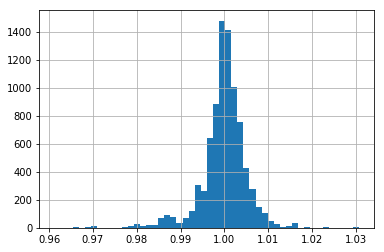

In [662]:
MergedDf['Ratio'].hist(bins = 50)

### Data Cleansing

In [663]:
def removeUrl(s):
    return re.sub(r'http[:/.a-zA-Z0-o]+', '',s)

def removeUser(s):
    return re.sub(r'@[a-zA-Z0-o]+', '',s)

def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [664]:
MergedDf['text'] = MergedDf['text'].apply(removeUrl)
MergedDf['text'] = MergedDf['text'].apply(removeUser)
MergedDf['text'] = MergedDf['text'].apply(deEmojify)

In [665]:
txt = MergedDf['text'][MergedDf['Date'] == '2019-09-26_b' ]
for s in txt:
    print(s, '\n')

THE GREATEST SCAM IN THE HISTORY OF AMERICAN POLITICS! 

Thank you Jim!  

If they actually did this the markets would crash. Do you think it was luck that got us to the best Stock Market and Economy in our history. It wasnt!  

So bad for our Country!  

So cute! Her father is under siege for no reason since his first day in office!  

One of our best fundraising days EVER!  

So true but it will never work!  

 

 

I have informed  Kevin McCarthy and all Republicans in the House that I fully support transparency on so-called whistleblower information but also insist on transparency from Joe Biden and his son Hunter on the millions of dollars that have been quickly and easily.... 

....taken out of Ukraine and China. Additionally I demand transparency from Democrats that went to Ukraine and attempted to force the new President to do things that they wanted under the form of political threat. 

Wow! Ukraine Whistleblowers lead attorney donated to Biden.  



In [666]:
MergedDf['Ratio'].describe()

count    8413.000000
mean        0.999908
std         0.005135
min         0.961263
25%         0.997943
50%         1.000260
75%         1.002335
max         1.030733
Name: Ratio, dtype: float64

In [667]:
from sklearn.preprocessing import RobustScaler
xx = RobustScaler().fit_transform(np.array(MergedDf['Ratio']).reshape(-1,1))

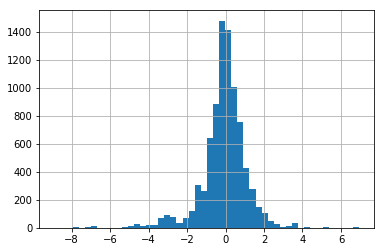

In [668]:
MergedDf['RatioScaled'] = xx
MergedDf['RatioScaled'].hist(bins = 50)

In [669]:
MergedDf = MergedDf.drop_duplicates()

In [670]:
len(MergedDf)

8413

In [709]:
MergedDf1 = MergedDf[['Date', 'Ratio','RatioScaled', 'text']]

In [710]:
MergedDf1 = MergedDf1.groupby(['Date', 'Ratio','RatioScaled'])['text'].apply('. '.join).reset_index()
len(MergedDf1)

1226

In [711]:
MergedDf1['Ratio'].describe()

count    1226.000000
mean        1.000136
std         0.005542
min         0.961263
25%         0.998217
50%         1.000460
75%         1.002747
max         1.030733
Name: Ratio, dtype: float64

In [760]:
MergedDf1['Category'] = -1
MergedDf1['Category'][MergedDf1['Ratio'] >= 1.003] = 0
MergedDf1['Category'][MergedDf1['Ratio'] <= 0.997] = 1

MergedDf1 = MergedDf1[MergedDf1['Category'] != -1]
MergedDf1.reset_index(drop=True, inplace=True)
MergedDf1['Category'].value_counts()

0    283
1    205
Name: Category, dtype: int64

In [761]:
MergedDf1.tail()

,Date,Ratio,RatioScaled,text,Category
483,2019-09-30_a,1.003259,0.682897,It was my Great Honor to attend this mornings ...,0
484,2019-10-01_a,0.985441,-3.374633,Why isnt Congressman Adam Schiff being brought...,1
485,2019-10-02_a,0.987291,-2.953241,The Do Nothing Democrats should be focused on ...,1
486,2019-10-02_b,0.994739,-1.257385,The Greatest Witch Hunt in the history of our ...,1
487,2019-10-03_a,1.008751,1.933500,Fake News just like the snakes and gators in t...,0


### Bag of words

In [762]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
#nltk.download('wordnet')

stemmer = nltk.stem.SnowballStemmer('english')
#stemmer = nltk.stem.PorterStemmer()

# 先词形还原再提取词干
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text, n):
    result = []
    for token in gensim.utils.simple_preprocess(text):   # convert document into tokens
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > n:
            result.append(lemmatize_stemming(token))
    return ' '.join(result)


In [763]:
len(MergedDf1)

488

(0, 500)

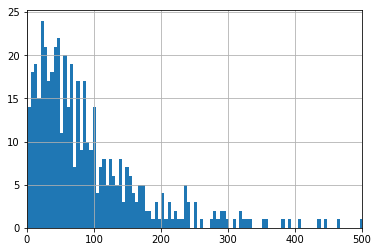

In [764]:
processed_docs = MergedDf1['text'].apply(lambda x: preprocess(x, 2))
sss = processed_docs.apply(lambda x: len(x.split(' ')))  # split the text into words and count
sss.hist(bins = 200)
plt.xlim(0, 500)

In [765]:
# Convert processed notes to count vector
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

Count_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                #max_features=4500,
                                stop_words='english')

cv = Count_vectorizer.fit_transform(processed_docs)

In [766]:
cv_array = cv.toarray()
cv_array.shape

(488, 2733)

In [767]:
X = cv_array
y = MergedDf1.Category

print(X.shape)
print(y.shape)

(488, 2733)
(488,)


In [768]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(366, 2733)
(122, 2733)
(366,)
(122,)


In [769]:
#X_train_df = pd.DataFrame(X_train, columns=Count_vectorizer.get_feature_names())
X_train_df = pd.DataFrame(X_train, columns=Count_vectorizer.get_feature_names())
X_train_df.head()

,abandon,abc,abe,abl,aboard,abort,abraham,abrupt,absolut,abus,...,yesterday,yield,york,young,youv,yuma,zealand,zero,zone,zte
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# PCA and Viz

In [770]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=3)

In [771]:
X_reduced = pca.fit_transform(X_train)
print ("Visualization using PCA reduced dimensions. The 3 dimensions explained the following pct of variance.")
print (np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))


Visualization using PCA reduced dimensions. The 3 dimensions explained the following pct of variance.
[19.09 22.77 26.  ]


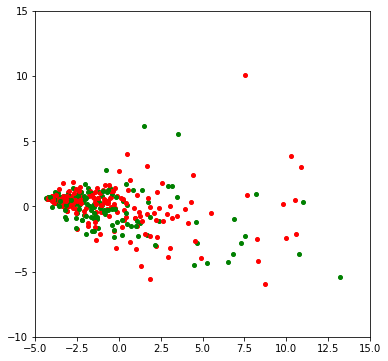

In [772]:
import matplotlib
from matplotlib import pyplot as plt
colors = ['r','g','b']
label = y_train.copy()
label.reset_index(drop=True, inplace=True)

plt.figure(figsize=(6,6),facecolor='white')
for i in range(len(X_reduced)):
    plt.plot(X_reduced[i][0], X_reduced[i][1],c=colors[label[i]],marker='o', markersize=4)
plt.xlim(-5,15)
plt.ylim(-10,15)
plt.show()

In [773]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [774]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
%time logreg.fit(X_train, y_train)

Wall time: 15 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [775]:
y_pred_class = logreg.predict(X_test)

In [776]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [777]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.5

In [778]:
TestRst = pd.DataFrame({'TrueLabel':y_test, 'PredictedLabel':y_pred_class}).reset_index()

In [779]:
TestRst.groupby(['TrueLabel','PredictedLabel']).count().unstack('PredictedLabel')

index    
PredictedLabel     0   1
TrueLabel               
0                 41  36
1                 25  20

### RandomForest

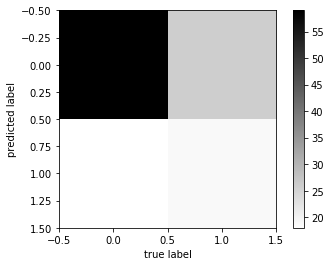

accuracy:  0.639344262295082
precision:  0.5135135135135135
recall:  0.4222222222222222
f1 score: 0.4634146341463415


In [789]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

Forest = RandomForestClassifier(n_estimators = 10, random_state = 1)
Forest = Forest.fit(X_train, y_train)

y_pred= Forest.predict(X_test)
y_pred_Prob = Forest.predict_proba(X_test)
plt.imshow(metrics.confusion_matrix(y_pred,y_test),
           interpolation='nearest',cmap=plt.cm.binary)
plt.colorbar()
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.show()

print ("accuracy: ",metrics.accuracy_score(y_test, y_pred))
print ("precision: ",metrics.precision_score(y_test,y_pred))
print ("recall: ",metrics.recall_score(y_test,y_pred))
print ("f1 score:",metrics.f1_score(y_test,y_pred))

In [790]:
metrics.accuracy_score(y_test, y_pred)

0.639344262295082

In [791]:
TestRst = pd.DataFrame({'TrueLabel':y_test, 'PredictedLabel':y_pred}).reset_index()
TestRst.groupby(['TrueLabel','PredictedLabel']).count().unstack('PredictedLabel')

index    
PredictedLabel     0   1
TrueLabel               
0                 59  18
1                 26  19

In [783]:
Importance = pd.Series(Forest.feature_importances_, index= Count_vectorizer.get_feature_names())
Importance = pd.Series.sort_values(Importance, ascending=False)
Importance

thank         0.008127
tax           0.006840
peopl         0.006570
job           0.005707
great         0.005033
border        0.004561
media         0.004499
long          0.004403
amp           0.004125
amaz          0.004036
chang         0.003954
democrat      0.003771
deal          0.003730
presid        0.003634
work          0.003598
good          0.003530
wall          0.003301
year          0.003296
state         0.003295
leadership    0.003264
time          0.003254
congratul     0.003202
big           0.003181
secur         0.003175
trump         0.003116
love          0.003113
american      0.003032
nation        0.002981
countri       0.002977
usa           0.002952
                ...   
throw         0.000000
deadlin       0.000000
thunder       0.000000
deputi        0.000000
theme         0.000000
describ       0.000000
disastr       0.000000
room          0.000000
maker         0.000000
disput        0.000000
disparag      0.000000
disinform     0.000000
dishonesti 

### Optimize iter

In [784]:
def Optmz(iter):
    Forest = RandomForestClassifier(n_estimators = iter, random_state = 1)
    Forest = Forest.fit(X_train, y_train)
    y_pred= Forest.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test,y_pred)
    
    return [iter, accuracy, f1]

In [785]:
RstList = []
for iter in range(10,300, 10):
    Rst = Optmz(iter)
    RstList.append(Rst)

In [786]:
RstDf = pd.DataFrame(RstList, columns = ['Iter','Accuracy','f1'])

In [787]:
RstDf[RstDf['Accuracy']>0.6]

,Iter,Accuracy,f1
0,10,0.639344,0.463415
1,20,0.622951,0.361111
7,80,0.606557,0.384615
12,130,0.606557,0.400000
13,140,0.606557,0.400000


In [788]:
?RandomForestClassifier